In [107]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 10.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [128]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor 
import xgboost as xgb

In [55]:
df = pd.read_csv('../Data/train_precios_vivienda.csv', quotechar='"', decimal=",")
df.head(2)

/tmp/ipykernel_4426/1876536623.py:1: DtypeWarning: Columns (67,109,110,160,168,169,170,171,178,180,206,210,212,216) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/train_precios_vivienda.csv', quotechar='"', decimal=",")


,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,4112,5896,43090.6247474074,Remate,Remates,GarantÃ­a Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,...,81968750.0,0,0.0,0,0.0,"145318750,00",2522304,"576134,95",0.0,0.0
1,7401,10570,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,QUINDÃO,...,0.0,157,78500000.0,No,0.0,713986654,257.23250000000002,2775647.14,-75.661152,4.5440265


In [56]:
df.shape

(11571, 222)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11571 entries, 0 to 11570
Columns: 222 entries, Unnamed: 0 to Latitud
dtypes: float64(1), int64(18), object(203)
memory usage: 19.6+ MB


In [58]:
df = df.fillna(0)
df_strings = df.loc[:, df.dtypes == object]
df_strings

,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,barrio,...,area_construccion,valor_area_construccion,area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,43090.6247474074,Remate,Remates,GarantÃ­a Hipotecaria,Remates,Vivienda,0,VALLE DEL CAUCA,TULUA,VICTORIA,...,"131,15",81968750.0,0,0,0.0,"145318750,00",2522304,"576134,95",0.0,0.0
1,0,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,0,QUINDÃO,ARMENIA,SECTOR CLINICAS,...,0,0.0,157,No,0.0,713986654,257.23250000000002,2775647.14,-75.661152,4.5440265
2,0,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,0,ANTIOQUIA,MEDELLIN,ROBLEDO PILARICA,...,0,0.0,0,Si,0.0,270500000,259.4264,1042684.94,-75.5841161,6.2770197
3,43091.6761393519,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,SOACHA,CIUDAD VERDE,...,0,0.0,0,No,0.0,"84840000,00",252245,"336339,67",0.0,0.0
4,0,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,META,GRANADA,BULEVAR ETAPA II,...,84.52,69306400.0,0,0,0.0,96346400,259.72770000000003,370951.58,-73.71237,3.565757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,0,OriginaciÃ³n,Leasing Habitacional,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,0,"BOGOTÃ, D. C.","BOGOTÃ, D. C.",Country Club,...,0,0,0,No,0,709028000,259.57420000000002,2731504.13,-74.0478446,4.7115785
11567,43157.0,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,0,ANTIOQUIA,MEDELLIN,BOYACA LAS BRISAS,...,0,0,0,Si,2193300,158356260,254.18279999999999,623001.48,-74.6104578,10.4637422
11568,0,OriginaciÃ³n,Leasing Habitacional,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,0,"BOGOTÃ, D. C.","BOGOTÃ, D. C.",Normandia,...,0,0,0,No,0,572610000,254.4109,2250729.04,-74.1096521,4.674083
11569,42999.4291148611,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,0,"BOGOTÁ, D. C.","BOGOTÁ, D. C.",Los Molinos - Rafeal U. U.,...,"115,39","97997000,00",0,0,0,"183290000,00",2517095,"728214,55",0.0,0.0


In [59]:
df.iloc[: , -20:]

,concepto_del_metodo_9,area_privada,valor_area_privada,area_garaje,valor_area_garaje,area_deposito,valor_area_deposito,area_terreno,valor_area_terreno,area_construccion,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,0,0,0,0,0,0,0,"253,4",63350000.0,"131,15",81968750.0,0,0.0,0,0.0,"145318750,00",2522304,"576134,95",0.0,0.0
1,0,254.98,635486654,0,0,0,0,0,0.0,0,0.0,157,78500000.0,No,0.0,713986654,257.23250000000002,2775647.14,-75.661152,4.5440265
2,0,82,246000000,13.21,22000000,1.02,2500000,0,0.0,0,0.0,0,0.0,Si,0.0,270500000,259.4264,1042684.94,-75.5841161,6.2770197
3,0,"48,48","84840000,00",0,0,0,0,0,0.0,0,0.0,0,0.0,No,0.0,"84840000,00",252245,"336339,67",0.0,0.0
4,0,0,0,0,0,0,0,104,27040000.0,84.52,69306400.0,0,0.0,0,0.0,96346400,259.72770000000003,370951.58,-73.71237,3.565757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,0,128.30000000000001,662028000,21.75,42000000.0,2.09,5000000,0,0,0,0,0,0.0,No,0,709028000,259.57420000000002,2731504.13,-74.0478446,4.7115785
11567,0,64.08,156162960,0,0.0,0,0,0,0,0,0,0,0.0,Si,2193300,158356260,254.18279999999999,623001.48,-74.6104578,10.4637422
11568,0,190.87,572610000,0,0.0,0,0,0,0,0,0,0,0.0,No,0,572610000,254.4109,2250729.04,-74.1096521,4.674083
11569,0,0,0,0,0.0,0,0,"65,61","85293000,00","115,39","97997000,00",0,0.0,0,0,"183290000,00",2517095,"728214,55",0.0,0.0


In [60]:
def limpieza1(df):
    
    for column in df:

        if df[column].dtype.name == 'object':
            df[column] = df[column].str.replace(',', '.')

        try:
            df[column] = df[column].astype(float)
        except:
            pass 

    return df

df = limpieza1(df)

In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11571 entries, 0 to 11570
Columns: 222 entries, Unnamed: 0 to Latitud
dtypes: float64(36), object(186)
memory usage: 19.6+ MB


In [62]:
df.Latitud.dtype

dtype('float64')

In [64]:
df_cols = pd.read_csv('../Data/Variables_Descartadas.csv', sep=';')

variables = [i for i in df_cols]

df = df[variables]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11571 entries, 0 to 11570
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11571 non-null  float64
 1   fecha_aprobación         4797 non-null   float64
 2   objeto                   11571 non-null  object 
 3   motivo                   11571 non-null  object 
 4   proposito                11571 non-null  object 
 5   tipo_avaluo              11571 non-null  object 
 6   tipo_credito             11571 non-null  object 
 7   tipo_subsidio            1352 non-null   object 
 8   departamento_inmueble    11571 non-null  object 
 9   municipio_inmueble       11571 non-null  object 
 10  barrio                   11565 non-null  object 
 11  sector                   11570 non-null  object 
 12  vias_pavimentadas        11571 non-null  object 
 13  sardineles_en_las_vias   11571 non-null  object 
 14  andenes_en_las_vias   

In [78]:
correccion_variables = {
    "estrato": "entero",
    "alcantarillado_en_el_sector": "binario",
    "acueducto_en_el_sector": "binario",
    "gas_en_el_sector": "binario",
    "energia_en_el_sector": "binario",
    "telefono_en_el_sector": "binario",
    "vias_pavimentadas": "binario",
    "sardineles_en_las_vias": "binario",
    "andenes_en_las_vias": "binario",
    "paradero": "binario",
    "alumbrado": "binario",
    "arborizacion": "binario",
    "alamedas": "binario",
    "gas_en_el_predio": "binario",
    "energia_en_el_predio": "binario",
    "telefono_en_el_predio": "binario",
    "numero_piso": "entero",
    "piscina": "binario",
    "tanque_de_agua": "binario",
    "garaje_visitantes": "binario",
    "teatrino": "binario",
    "sauna": "binario",
    "vigilancia_privada": "binario",
    "tipo_vigilancia": "binario",
    "administracion": "binario",
    "habitaciones": "entero",
    "estar_habitacion": "entero",
    "cuarto_servicio": "entero",
    "closet": "entero",
    "sala": "entero",
    "comedor": "entero",
    "bano_privado": "entero",
    "bano_social": "entero",
    "bano_servicio": "entero",
    "cocina": "entero",
    "estudio": "entero",
    "balcon": "entero",
    "terraza": "entero",
    "patio_interior": "entero",
    "jardin": "entero",
    "zona_de_ropas": "entero",
    "zona_verde_privada": "entero",
    "local": "entero",
    "oficina": "entero",
    "bodega": "entero",
}

def corregir_variables(df, diccionario):

    for i in df:
        if i in diccionario:
            valor = diccionario[i]
            if valor == 'entero':
                try:
                    df = df[pd.to_numeric(df[i], errors='coerce').notnull()]
                    df[i] = df[i].astype(float)
                except:
                    pass
            elif valor == "binario":
                df[i] = [1 if x =='Si' else 0 for x in df[i]]
            else:
                pass
    
    return df

df_prueba = corregir_variables(df, correccion_variables)
df_prueba.head(3)

/tmp/ipykernel_4426/3195067971.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = [1 if x =='Si' else 0 for x in df[i]]
/tmp/ipykernel_4426/3195067971.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(float)


,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
8192,2801.0,43026.406742,Originación,Actualización de garantías,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,VALLE DEL CAUCA,CALI,...,0.0,0.0,0.0,No,0.0,162411600.0,2.520012e+06,644487.41,0.000000,0.000000
8193,16029.0,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,RIONEGRO,...,0.0,0.0,0.0,Si,0.0,309234000.0,2.597905e+02,1190320.66,-75.371089,6.143670
8194,14035.0,NaN,OriginaciÃ³n,Colomext Hipotecario,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,BOGOTÃ. D. C.,BOGOTÃ. D. C.,...,90442500.0,0.0,0.0,0,0.0,162442500.0,2.591550e+02,626816.00,-74.121500,4.521718


In [77]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 8192 to 11570
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3346 non-null   float64
 1   fecha_aprobación         1325 non-null   float64
 2   objeto                   3346 non-null   object 
 3   motivo                   3346 non-null   object 
 4   proposito                3346 non-null   object 
 5   tipo_avaluo              3346 non-null   object 
 6   tipo_credito             3346 non-null   object 
 7   tipo_subsidio            379 non-null    object 
 8   departamento_inmueble    3346 non-null   object 
 9   municipio_inmueble       3346 non-null   object 
 10  barrio                   3344 non-null   object 
 11  sector                   3346 non-null   object 
 12  vias_pavimentadas        3346 non-null   int64  
 13  sardineles_en_las_vias   3346 non-null   int64  
 14  andenes_en_las_vias 

In [94]:
df_num = df_prueba.select_dtypes(exclude=['object'])

enc = OneHotEncoder()

transformed = enc.fit_transform(df_prueba[['departamento_inmueble']])

df_num[enc.categories_[0]] = transformed.toarray()


In [100]:
df_num_ = df_num.drop(["id", "fecha_aprobación", "valor_total_avaluo"], axis=1)
df_num_

,vias_pavimentadas,sardineles_en_las_vias,andenes_en_las_vias,estrato,area_valorada,paradero,alumbrado,arborizacion,alamedas,gas_en_el_predio,...,NORTE DE SANTANDER,PUTUMAYO,QUINDÃO,QUINDÍO,RISARALDA,SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VICHADA
8192,0,0,0,4.0,93.34,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8193,0,0,0,4.0,76.82,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8194,0,0,0,2.0,97.25,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8195,0,0,0,4.0,105.00,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8196,0,0,0,5.0,70.95,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,0,0,0,5.0,128.30,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11567,0,0,0,3.0,64.08,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11568,0,0,0,4.0,190.87,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11569,0,0,0,2.0,115.39,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X = df_num_
y = df_num['valor_total_avaluo']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [121]:
params1 = {
    'n_estimators':[500],
    'max_depth':[3,5],
    'learning_rate':np.linspace(0.001,0.1,2),
    'gamma':np.linspace(0,1,2),#
    'min_child_weight':np.linspace(1,5,2),#
    'subsample':np.linspace(0.3,0.9,2), # 
    'colsample_bytree':np.linspace(0.3,0.9,2),#
}


xgb_estimator1 = XGBRegressor(seed=42)

xgb_estimator2 = XGBRegressor(learning_rate =0.1, n_estimators=1000,
      subsample=0.6, colsample_bytree=0.6,seed=42)

gsearch1 = GridSearchCV(estimator=xgb_estimator1,param_grid=params1,
                       scoring='neg_mean_absolute_percentage_error',n_jobs=-1,
                       refit='neg_mean_absolute_percentage_error',cv=4,verbose=11)

xgb_estimator2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [122]:
from sklearn.metrics import mean_absolute_percentage_error

preds = xgb_estimator2.predict(X_test)

print(np.sqrt(mean_absolute_percentage_error(preds, y_test)))
print(mean_absolute_percentage_error(preds, y_test))

1.6640739223091527
2.769142018909368


In [123]:
gsearch1.fit(X_train,y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
[CV 1/4; 1/64] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1.0, n_estimators=500, subsample=0.3
[CV 3/4; 1/64] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1.0, n_estimators=500, subsample=0.3
[CV 2/4; 1/64] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1.0, n_estimators=500, subsample=0.3
[CV 1/4; 2/64] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1.0, n_estimators=500, subsample=0.9
[CV 4/4; 1/64] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=1.0, n_estimators=500, subsample=0.3
[CV 1/4; 3/64] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=3, min_child_weight=5.0, n_estimators=500, subsample=0.3
[CV 2/4; 2/64] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.001, max_depth=3

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': array([0.3, 0.9]),
                         'gamma': array([0., 1.]),
                         'learning_rate': array([0.001, 0.1  ]),
           

In [124]:
preds2 = gsearch1.predict(X_test)

print(np.sqrt(mean_absolute_percentage_error(preds2, y_test)))
print(mean_absolute_percentage_error(preds2, y_test))

6.901543471144175
47.63130228409279


In [126]:
print(f'Mejor Estimador: {gsearch1.best_estimator_}')
print(f'Mejores parametros: {gsearch1.best_params_}')
print(f'Mejor Métrica MAPE: {gsearch1.best_score_}')

Mejor Estimador: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1.0, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)
Mejores parametros: {'colsample_bytree': 0.9, 'gamma': 0.0, 'learning_rate': 0.001, 'max_depth': 5, 'min_child_weight': 1.0, 'n_estimators': 500, 'subsample': 0.9}
Mejor Métrica MAPE: -6.21912172585978e+21


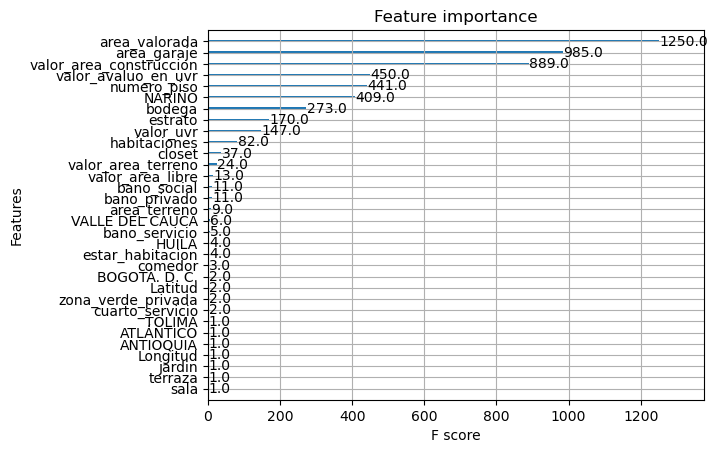

In [130]:
xgb.plot_importance(gsearch1.best_estimator_)
plt.rcParams['figure.figsize'] = [100, 20]
plt.show()